
# Disease Prediction from Medical Data
### Internship Task – CodeAlpha

## Objective
Predict the possibility of diseases based on structured patient medical data using classification algorithms.

## Algorithms Used
- Logistic Regression
- Support Vector Machine (SVM)
- Random Forest
- XGBoost

## Dataset
Breast Cancer Dataset (UCI ML Repository via sklearn)

---


In [1]:

# ===============================
# Disease Prediction Project
# ===============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_auc_score)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


In [2]:

# Load Dataset
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset Shape:", X.shape)
print("Target Classes:", data.target_names)

X.head()


Dataset Shape: (569, 30)
Target Classes: ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Missing Values: 0


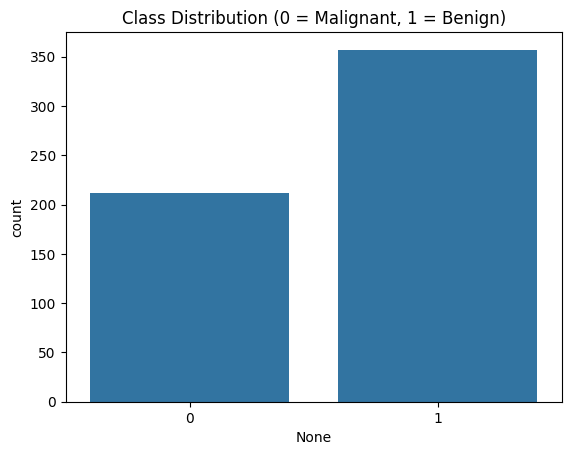

In [3]:

# Check missing values
print("Missing Values:", X.isnull().sum().sum())

# Class distribution
sns.countplot(x=y)
plt.title("Class Distribution (0 = Malignant, 1 = Benign)")
plt.show()


In [4]:

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Model: LogisticRegression
Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



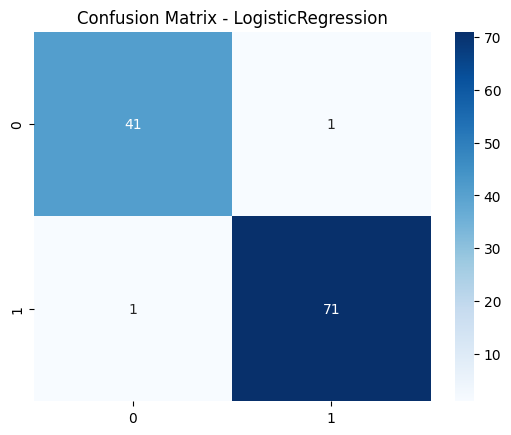

ROC-AUC Score: 0.9953703703703703
--------------------------------------------------
Model: SVC
Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



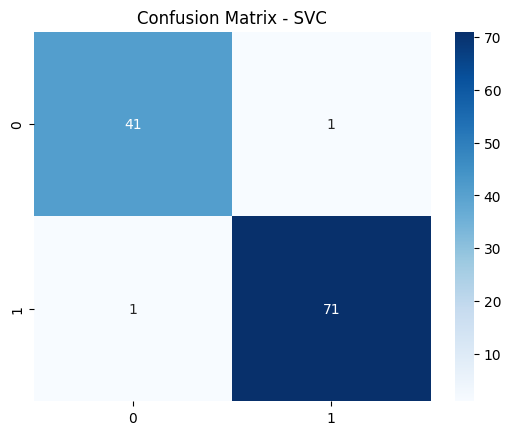

ROC-AUC Score: 0.9950396825396826
--------------------------------------------------
Model: RandomForestClassifier
Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



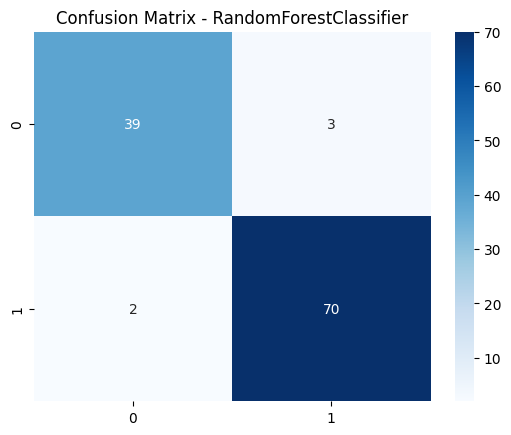

ROC-AUC Score: 0.9937169312169312
--------------------------------------------------
Model: XGBClassifier
Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



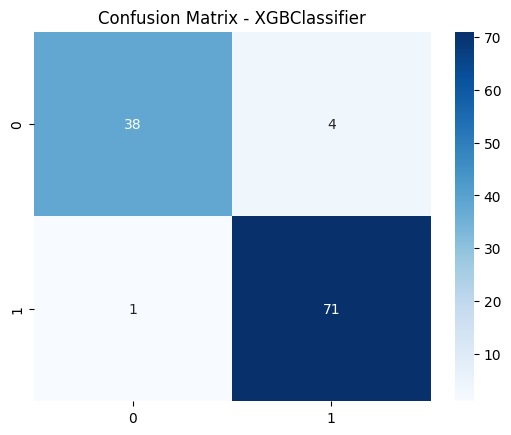

ROC-AUC Score: 0.9900793650793651
--------------------------------------------------


In [6]:

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Model:", model.__class__.__name__)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()

    y_prob = model.predict_proba(X_test)[:,1]
    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
    print("-"*50)

# Evaluate Models
evaluate_model(log_model, X_test_scaled, y_test)
evaluate_model(svm_model, X_test_scaled, y_test)
evaluate_model(rf_model, X_test, y_test)
evaluate_model(xgb_model, X_test, y_test)


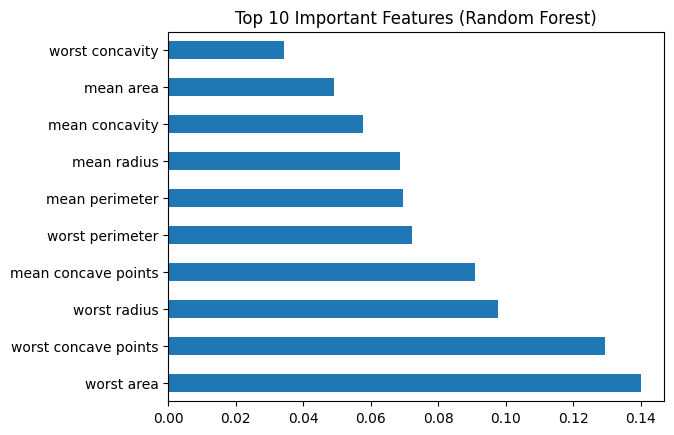

In [7]:

# Feature Importance (Random Forest)
importances = rf_model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


Model Comparison Table

In [8]:
models = {
    "Logistic Regression": log_model,
    "SVM": svm_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

results = []

for name, model in models.items():
    if name in ["Logistic Regression", "SVM"]:
        X_eval = X_test_scaled
    else:
        X_eval = X_test

    y_pred = model.predict(X_eval)
    acc = accuracy_score(y_test, y_pred)
    results.append([name, acc])

comparison = pd.DataFrame(results, columns=["Model", "Accuracy"])
comparison.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
0,Logistic Regression,0.982456
1,SVM,0.982456
2,Random Forest,0.956140
3,XGBoost,0.956140
